# Section 5.5.5
# Superposition in space and time with the erfc function

IHE, Delft, 2010-01-06

@T.N.Olsthoorn

Two sides of strip of land with equal sudden change of surface-water stage on both sides.

See page 63 of the syllabus

Set up a mirror scheme for the case of a strip of land bounded by straigt surface water on either side, where the surface water stage at both sides suddenly changes by the same amount.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

## Convenience function for setting up graphs

In [23]:
def newfig(title='?', xlabel='?', ylabel='?', xlim=None, ylim=None,
                   xscale='linear', yscale='linear', size_inches=(14, 8)):
    '''Setup a new axis for plotting'''
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    ax.grid(True)
    return ax

In [24]:
# Aquifer and land-strip properties

kD = 400 # m2/d
S  = 0.1 # [-]
L  = 200 # m (width of land strip)
A  = 2 # m (sudden change of river stage)

# Choose points within the cross section to compute the heads
x  = np.linspace(-L/2, +L/2, 101)

# Choosing visualization times, in this case we'll draw one per week (7 d)
# The half time would be T = 0.24 sqrt(L^2 S / kD) see syllabus.
T50 = 0.24 * np.sqrt(L ** 2 * S / kD)
times = np.arange(T50, 11 * T50, T50)


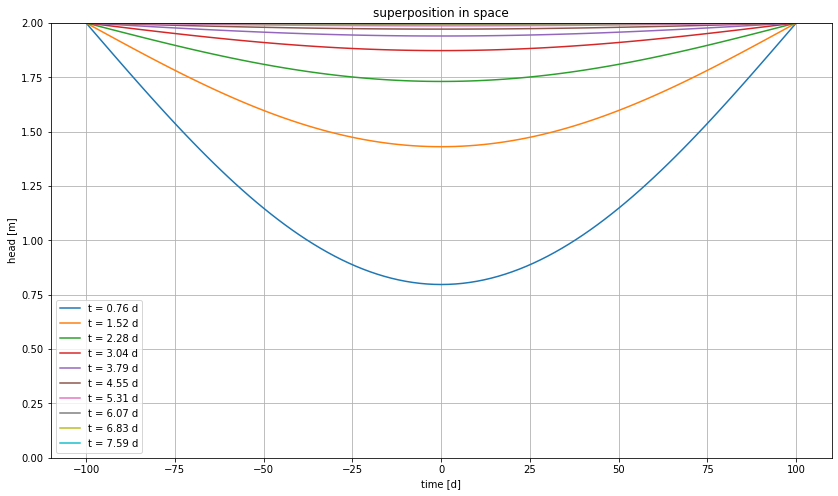

In [27]:
# Superpositionin in time using the erfc function, see syllabus page 62

ax = newfig('superposition in space', 'time [d]', 'head [m]')


for t in times:
    s = np.zeros_like(x)
    for i in range(1, 11):
        ds = A * (-1)**(i-1) * (
            sp.erfc((L/2 * (2 * i -1) + x) * np.sqrt(S / (4 * kD * t))) +
            sp.erfc((L/2 * (2 * i -1) - x) * np.sqrt(S / (4 * kD * t))))
        s = s + ds
    plt.plot(x, s, label='t = {:4.2f} d'.format(t))

plt.legend()
plt.ylim(0, A)

plt.show()

## Compare this result with the that of the analytical formula on page 63 of the syllabus, which is a summation the product of a cosine and an exponent. The expressions are completely different, but yield the same result

There is a differnce, in that the solution with the erfc functions represents the head in the strip of land after the stage on both sides of the strip suddenly changed by a fixed amount, whereas this one represents a strip in which the groundwater head is initially uniform at a distance A above that of the surface water on both sides, after which it drains out. However, the A - first solution equals the second.

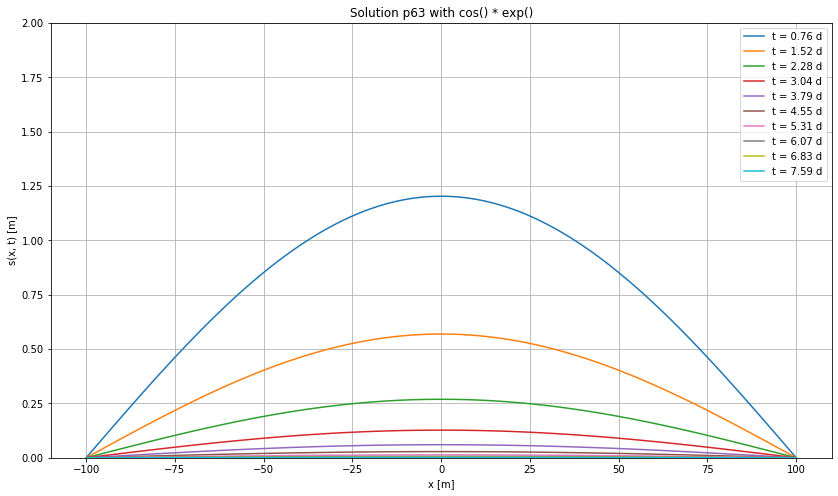

In [26]:
# Using the analytical solution on page 63 of the syllabus

ax = newfig('Solution p63 with cos() * exp()', 'x [m]', 's(x, t) [m]', ylim=(0, 2))

b = L/2
for t in times:
    s = np.zeros_like(x)    
    for j in range(1, 11):
        ds = A * 4/np.pi * \
             (-1)**(j-1) / (2*j - 1) *\
             np.cos((2 * j -1) * np.pi/2 * x/b) *\
             np.exp(-(2 * j -1)**2 * (np.pi/2)**2 * kD/(b**2 * S) * t)
        s = s + ds
    ax.plot(x, s, label='t = {:4.2f} d'.format(t))
    
plt.legend()


As you can see, both solutions are the same at least: you get the second one when you subtact the first one from A (A=2 m), alternatively, you get the first one of you subtract the second one from A.